In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("FuelConsumption (1).csv")

In [20]:
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

In [21]:
df = df.drop(['MAKE', 'MODEL'], axis=1)

In [22]:
label_cols = ['FUEL', 'TRANSMISSION', 'VEHICLE_CLASS']
le_dict = {}

In [24]:
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  
    le_dict[col] = le

In [25]:
df = df.dropna()

In [26]:
X = df.drop('COEMISSIONS', axis=1)
y = df['COEMISSIONS']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred = model.predict(X_test)

In [30]:
print("✅ Model Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

✅ Model Performance:
Mean Absolute Error (MAE): 6.713202847158685
Mean Squared Error (MSE): 76.04665342397585
R² Score: 0.9854747963026996


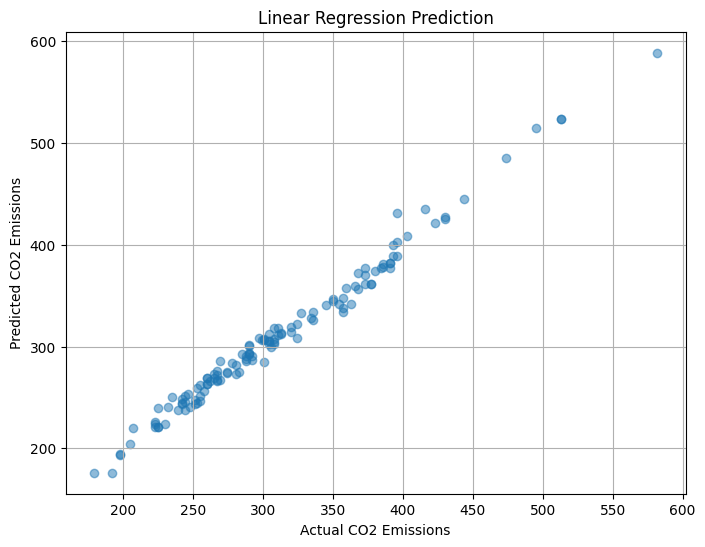

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Linear Regression Prediction")
plt.grid(True)
plt.show()

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score (Accuracy-like): {r2:.4f} ({r2 * 100:.2f}%)")

✅ Model Evaluation Metrics:
Mean Absolute Error (MAE): 6.71
Mean Squared Error (MSE): 76.05
R² Score (Accuracy-like): 0.9855 (98.55%)
